In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
ebay_data = pd.read_csv('ebay.csv')

In [48]:
ebay_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   biddable     3796 non-null   int64  
 1   sold         3796 non-null   int64  
 2   startprice   3796 non-null   float64
 3   saleprice    799 non-null    float64
 4   condition    3796 non-null   object 
 5   size         3728 non-null   float64
 6   heel         2835 non-null   object 
 7   style        3796 non-null   object 
 8   color        3796 non-null   object 
 9   material     3796 non-null   object 
 10  snippit      761 non-null    object 
 11  description  3711 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 252.1+ KB


In [49]:
ebay_data.head()

,biddable,sold,startprice,saleprice,condition,size,heel,style,color,material,snippit,description
0,1,0,199.00,NaN,Pre-owned,9.5,Low,Open Toe,Black,Suede,Had soles re- covered.,Very good condition. Heel height very manageab...
1,0,0,375.00,NaN,New with box,7.5,High,Slingback,Other/Missing,Satin,NaN,"From my own personal collection, great conditi..."
2,1,1,299.99,780.0,Pre-owned,8.5,High,Pump,Black,Other/Missing,NaN,With its staggering half-foot-high heel and ch...
3,1,1,49.99,561.0,Pre-owned,8.5,High,Pump,Black,Snakeskin,NaN,"Comes w/ box, dustbag, and extra heel in its o..."
4,0,0,89.00,NaN,Pre-owned,5.5,Flat,Other/Missing,Other/Missing,Leather,NaN,Please ask questions before bidding. \n \nThis...


<AxesSubplot:xlabel='condition', ylabel='count'>

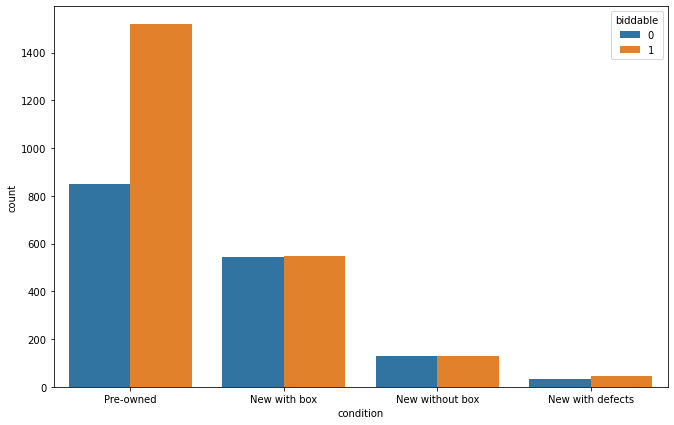

In [15]:
plt.figure(figsize=(11,7))
sns.countplot(x='condition',hue='biddable',data=ebay_data)

<AxesSubplot:xlabel='condition', ylabel='count'>

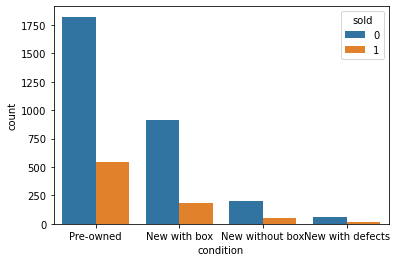

In [16]:
sns.countplot(x='condition',hue='sold',data=ebay_data)

In [50]:
## check missing value 
print(ebay_data.isnull().sum())

biddable          0
sold              0
startprice        0
saleprice      2997
condition         0
size             68
heel            961
style             0
color             0
material          0
snippit        3035
description      85
dtype: int64


In [19]:
corrMatrix = ebay_data.corr(method ='pearson') 


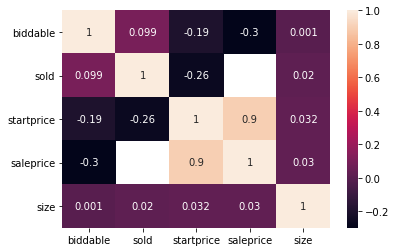

In [21]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [51]:
#removing cols as there are extreme null values

ebay_data.drop('saleprice', axis=1, inplace=True)


In [52]:
ebay_data.drop('snippit', axis=1, inplace=True)


In [53]:
ebay_data.head()

,biddable,sold,startprice,condition,size,heel,style,color,material,description
0,1,0,199.00,Pre-owned,9.5,Low,Open Toe,Black,Suede,Very good condition. Heel height very manageab...
1,0,0,375.00,New with box,7.5,High,Slingback,Other/Missing,Satin,"From my own personal collection, great conditi..."
2,1,1,299.99,Pre-owned,8.5,High,Pump,Black,Other/Missing,With its staggering half-foot-high heel and ch...
3,1,1,49.99,Pre-owned,8.5,High,Pump,Black,Snakeskin,"Comes w/ box, dustbag, and extra heel in its o..."
4,0,0,89.00,Pre-owned,5.5,Flat,Other/Missing,Other/Missing,Leather,Please ask questions before bidding. \n \nThis...


In [54]:
ebay_data.dtypes

biddable         int64
sold             int64
startprice     float64
condition       object
size           float64
heel            object
style           object
color           object
material        object
description     object
dtype: object

In [55]:
obj_df = ebay_data.select_dtypes(include=['object']).copy()
obj_df.head()

,condition,heel,style,color,material,description
0,Pre-owned,Low,Open Toe,Black,Suede,Very good condition. Heel height very manageab...
1,New with box,High,Slingback,Other/Missing,Satin,"From my own personal collection, great conditi..."
2,Pre-owned,High,Pump,Black,Other/Missing,With its staggering half-foot-high heel and ch...
3,Pre-owned,High,Pump,Black,Snakeskin,"Comes w/ box, dustbag, and extra heel in its o..."
4,Pre-owned,Flat,Other/Missing,Other/Missing,Leather,Please ask questions before bidding. \n \nThis...


In [59]:
obj_df[obj_df.isnull().any(axis=1)]

,condition,heel,style,color,material,description
71,Pre-owned,High,Slingback,Other/Missing,Leather,NaN
170,Pre-owned,High,Platform,Black,Patent Leather,NaN
180,Pre-owned,Medium,Open Toe,Other/Missing,Patent Leather,NaN
242,New with box,High,Open Toe,Black,Patent Leather,NaN
366,New with box,Medium,Other/Missing,Black,Suede,NaN
...,...,...,...,...,...,...
3669,New with box,High,Pump,Brown,Leather,NaN
3672,New with box,High,Pump,Brown,Leather,NaN
3722,New with box,High,Open Toe,Other/Missing,Leather,NaN
3747,New with box,High,Pump,Other/Missing,Leather,NaN


In [60]:
obj_df["heel"].value_counts()


High      3571
Medium     163
Low         38
Flat        24
Name: heel, dtype: int64

In [58]:
obj_df = obj_df.fillna({"heel": "High"})

In [61]:
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   condition    3796 non-null   object
 1   heel         3796 non-null   object
 2   style        3796 non-null   object
 3   color        3796 non-null   object
 4   material     3796 non-null   object
 5   description  3711 non-null   object
dtypes: object(6)
memory usage: 89.0+ KB


In [71]:
obj_df.columns

Index(['condition', 'heel', 'style', 'color', 'material', 'description'], dtype='object')

In [72]:
ebay_data.columns

Index(['biddable', 'sold', 'startprice', 'condition', 'size', 'heel', 'style',
       'color', 'material', 'description'],
      dtype='object')

In [73]:
ebay_data2=ebay_data[['biddable', 'sold', 'startprice']]

In [74]:
ebay_data1=pd.concat([ebay_data2,obj_df],axis=1)

In [75]:
ebay_data1.head()

,biddable,sold,startprice,condition,heel,style,color,material,description
0,1,0,199.00,Pre-owned,Low,Open Toe,Black,Suede,Very good condition. Heel height very manageab...
1,0,0,375.00,New with box,High,Slingback,Other/Missing,Satin,"From my own personal collection, great conditi..."
2,1,1,299.99,Pre-owned,High,Pump,Black,Other/Missing,With its staggering half-foot-high heel and ch...
3,1,1,49.99,Pre-owned,High,Pump,Black,Snakeskin,"Comes w/ box, dustbag, and extra heel in its o..."
4,0,0,89.00,Pre-owned,Flat,Other/Missing,Other/Missing,Leather,Please ask questions before bidding. \n \nThis...


In [76]:
ebay_data1.drop('description', axis=1, inplace=True)


In [78]:
ebay_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   biddable    3796 non-null   int64  
 1   sold        3796 non-null   int64  
 2   startprice  3796 non-null   float64
 3   condition   3796 non-null   object 
 4   heel        3796 non-null   object 
 5   style       3796 non-null   object 
 6   color       3796 non-null   object 
 7   material    3796 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 163.2+ KB


In [80]:
condition_df=pd.get_dummies(ebay_data1['condition'],drop_first=True)
condition_df.head()

,New with defects,New without box,Pre-owned
0,0,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [84]:
heel_df=pd.get_dummies(ebay_data1['heel'],drop_first=True)
style_df=pd.get_dummies(ebay_data1['style'],drop_first=True)
color_df=pd.get_dummies(ebay_data1['color'],drop_first=True)
material_df=pd.get_dummies(ebay_data1['material'],drop_first=True)

In [95]:
ebay_train=pd.concat([ebay_data1,condition_df,heel_df,style_df,color_df,material_df],axis=1)

In [97]:
ebay_train.drop(['condition','heel','style','color','material'], axis=1, inplace=True)


In [98]:
ebay_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   biddable          3796 non-null   int64  
 1   sold              3796 non-null   int64  
 2   startprice        3796 non-null   float64
 3   New with defects  3796 non-null   uint8  
 4   New without box   3796 non-null   uint8  
 5   Pre-owned         3796 non-null   uint8  
 6   High              3796 non-null   uint8  
 7   Low               3796 non-null   uint8  
 8   Medium            3796 non-null   uint8  
 9   Other/Missing     3796 non-null   uint8  
 10  Platform          3796 non-null   uint8  
 11  Pump              3796 non-null   uint8  
 12  Slingback         3796 non-null   uint8  
 13  Stiletto          3796 non-null   uint8  
 14  Black             3796 non-null   uint8  
 15  Brown             3796 non-null   uint8  
 16  Other/Missing     3796 non-null   uint8  


In [168]:
ebay_train.drop([''
])

,biddable,sold,startprice,New with defects,New without box,Pre-owned,High,Low,Medium,Other/Missing,...,Stiletto,Black,Brown,Other/Missing,Red,Other/Missing,Patent Leather,Satin,Snakeskin,Suede
0,1,0,199.00,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,375.00,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,1,1,299.99,0,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,1,49.99,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,89.00,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [100]:
X=ebay_train.drop('sold',axis=1)
Y=ebay_train['sold']
Y=Y.astype('int')

In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=11)

In [144]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [145]:
print(X_test_norm)

[[1.         0.07777556 0.         ... 0.         0.         0.        ]
 [1.         0.03311111 0.         ... 0.         0.         0.        ]
 [0.         0.13110889 0.         ... 0.         0.         0.        ]
 ...
 [1.         0.11555333 0.         ... 0.         0.         0.        ]
 [0.         0.06444444 0.         ... 0.         0.         1.        ]
 [0.         0.17755556 0.         ... 0.         0.         1.        ]]


In [161]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)


c:\users\amhotta\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [162]:
predictions=logmodel.predict(X_test)

In [155]:
from sklearn.metrics import classification_report


In [163]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       602
           1       0.69      0.18      0.29       158

    accuracy                           0.81       760
   macro avg       0.76      0.58      0.59       760
weighted avg       0.79      0.81      0.77       760



In [157]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [164]:
confusion_matrix(y_test,predictions)

array([[589,  13],
       [129,  29]], dtype=int64)

In [165]:
accuracy_score(y_test, predictions)

0.8131578947368421

In [132]:
#Decision trees
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(criterion = "gini", random_state = 4,
                               max_depth=3, min_samples_leaf=5)


classifier1.fit(X_train_norm, y_train)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=4)

In [133]:
#predictions

predictions = classifier1.predict(X_test_norm)

In [134]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1187
           1       0.66      0.28      0.40       332

    accuracy                           0.81      1519
   macro avg       0.74      0.62      0.64      1519
weighted avg       0.79      0.81      0.78      1519



In [135]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, predictions))
accuracy_score(y_test, predictions)

[[1138   49]
 [ 238   94]]


0.8110599078341014

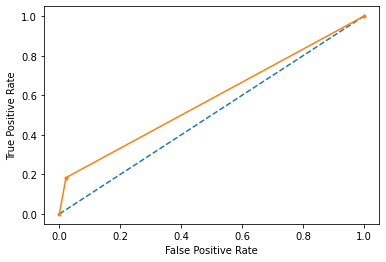

In [166]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the plot
pyplot.show()

In [137]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)

In [138]:
rfc.fit(X_train_norm,y_train)

RandomForestClassifier(n_estimators=600)

In [139]:
predictions = rfc.predict(X_test_norm)

In [140]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1187
           1       0.49      0.35      0.41       332

    accuracy                           0.78      1519
   macro avg       0.66      0.62      0.64      1519
weighted avg       0.76      0.78      0.76      1519



In [141]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, predictions))
accuracy_score(y_test, predictions)

[[1065  122]
 [ 215  117]]


0.7781435154707044